In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, t, omega, epsilon):
    
    return a(t, omega, epsilon)*(x**2)+b(t, omega, epsilon)*x

def a(t, omega, epsilon):
    
    return epsilon*np.sin(omega*t)

def b(t, omega, epsilon):
    
    return 1 - 2*epsilon*np.sin(omega*t)

def psi(params, x, y, t):
    
    A = params[0]
    omega = params[1]
    epsilon = params[2]

    return A*np.sin(np.pi*f(x, t, omega, epsilon))*np.sin(np.pi*y)

def double_gyre(params, x, y, t, dx, dy):
    
    X, Y, time = np.meshgrid(x, y, t)
    
    u = np.zeros(X.shape)
    v = np.zeros(Y.shape)
    
    for i in range(X.shape[0]):
        
        for j in range(Y.shape[1]):
            
            for k in range(time.shape[2]):
                
                x_ = X[i, j, k]
                y_ = Y[i, j, k]
                t_ = time[i, j, k]
                
                u[i, j, k] = -(psi(params, x_, y_ + dy, t_)-psi(params, x_, y_- dy, t_))/(2*dy)
                v[i, j, k] = (psi(params, x_ + dx, y_, t_)-psi(params, x_ - dx, y_, t_))/(2*dx)
    
    v[0,:, :] = 0
    v[-1,:,:] = 0
    u[:,0, :] = 0
    u[:,-1,:] = 0
    
    return u, v

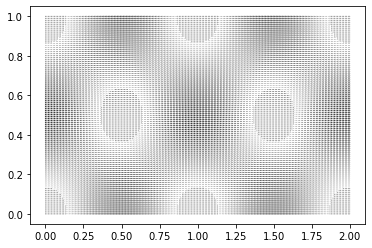

In [2]:
t = np.arange(0, 10+1, 0.2)
x = np.arange(0, 2+0.01, 0.01)
y = np.arange(0, 1+0.01, 0.01)

A = .1
omega = np.pi/5
epsilon = 0.1

dx = 0.01
dy = 0.01

params = [A, omega, epsilon]

u, v = double_gyre(params, x, y, t, dx, dy)

boundary = False

plt.quiver(x, y, u[:, :, 0], v[:, :, 0])
plt.show()

In [3]:
import scipy.io
scipy.io.savemat('double_gyre.mat', {'u': u, 'v': v, 'x': x, 'y': y, 't': t})